# Bank Marketing Data : decision tree - random forest & logit & KNN & SVM 

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification 
from sklearn.linear_model import SGDClassifier 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (12, 8) 

In [6]:
# Load data file
df =pd.read_csv('data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Data processing 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
deposit      object
dtype: object

## Exploratory data analysis 

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df.describe(exclude = (['float64', 'int64']))

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


<AxesSubplot:xlabel='education', ylabel='count'>

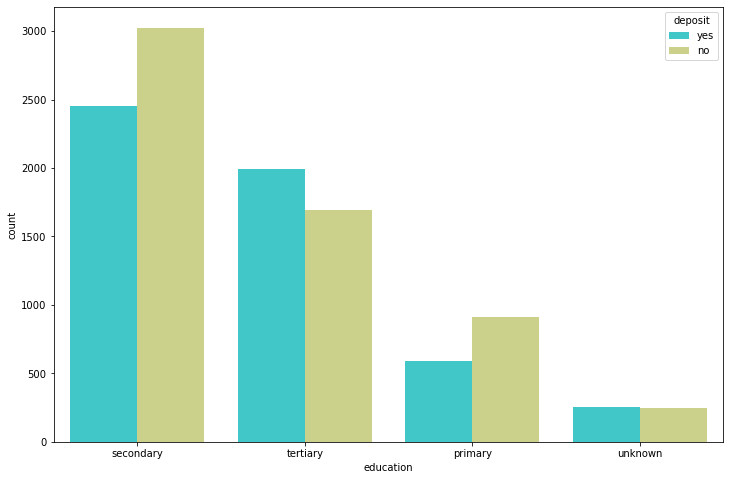

In [12]:
sns.countplot(x='education',data = df, palette='rainbow',hue='deposit' )

<AxesSubplot:xlabel='deposit', ylabel='duration'>

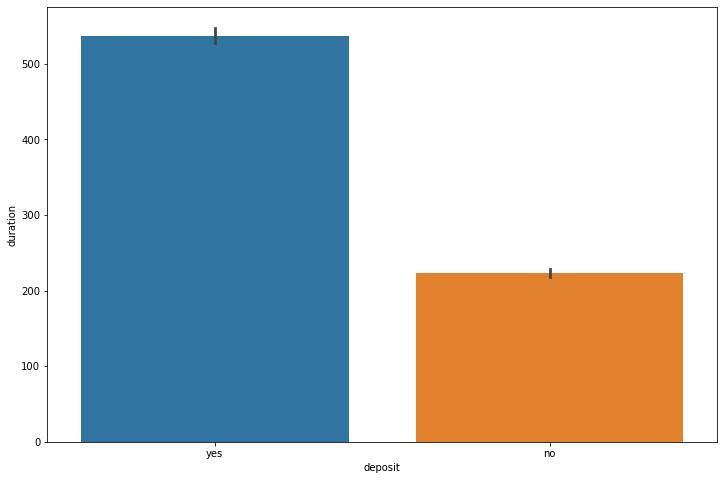

In [13]:
# call duration vs deposit
sns.barplot(x='deposit', y = 'duration', data = df)

<AxesSubplot:xlabel='education', ylabel='age'>

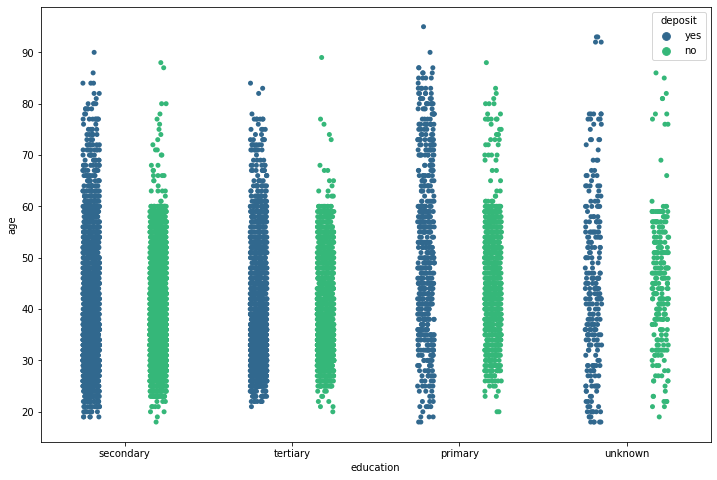

In [15]:
sns.stripplot(x='education', y='age', data=df, jitter=True, hue='deposit', dodge=True, palette='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


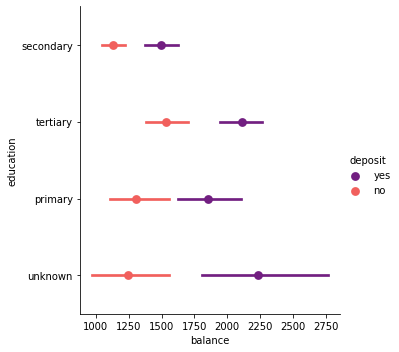

In [11]:
g = sns.factorplot('balance','education',data=df,
                   hue='deposit',
                   size=5,
                   aspect=1,
                   palette='magma',
                   join=False,
              )

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


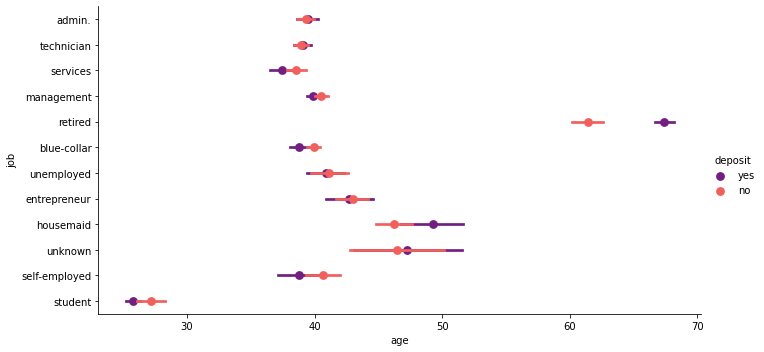

In [19]:
g = sns.factorplot('age','job',data=df,
                   hue='deposit',
                   size=5,
                   aspect=2,
                   palette='magma',
                   join=False,
              )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


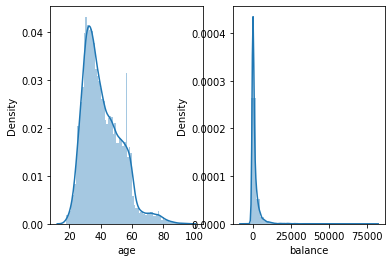

In [13]:
plt.subplot(1,2,1)
sns.distplot(df.age, bins=75)

plt.subplot(1,2,2)
sns.distplot(df.balance, bins=30)

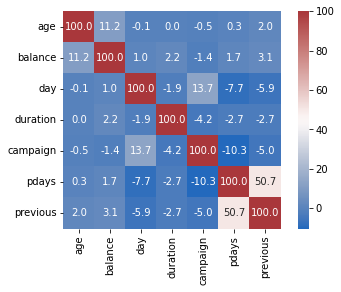

In [14]:
# correlation matrix
sns.heatmap(
    100*df.corr(), 
    square=True, 
    annot=True, 
    fmt='.1f', 
    cmap=sns.cm.vlag )

## Convert categorical data

In [15]:
# Combine unknown with similar 
df['job'] = df['job'].replace(['unknown'], 'other')
df['poutcome'] = df['poutcome'].replace(['unknown'] , 'other')

In [16]:
list_dummi =[ 'default', 'housing', 'deposit', 'loan']
for elem in list_dummi : 
    df[elem] = df[elem].map( {'yes':1, 'no':0} )

In [17]:
# delete variables that are not relevant 
df.drop(['contact', 'day', 'month', 'pdays'], axis=1, inplace=True)

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,1042,1,0,other,1
1,56,admin.,married,secondary,0,45,0,0,1467,1,0,other,1
2,41,technician,married,secondary,0,1270,1,0,1389,1,0,other,1
3,55,services,married,secondary,0,2476,1,0,579,1,0,other,1
4,54,admin.,married,tertiary,0,184,0,0,673,2,0,other,1


In [19]:
# Convert categorical variables to dummies
df = pd.get_dummies(data=df, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df.head()

,age,default,balance,housing,loan,duration,campaign,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,0,2343,1,0,1042,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,56,0,45,0,0,1467,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,41,0,1270,1,0,1389,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,55,0,2476,1,0,579,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,54,0,184,0,0,673,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


## Classification

Model 

In [20]:
X = df.drop('deposit' , axis = 'columns') 
y = df.deposit
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [21]:
# Train-Test split: 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (8929, 30)
Shape of X_test=> (2233, 30)
Shape of Y_train=> (8929,)
Shape of Y_test=> (2233,)


### Instantiation of the decision tree

In [22]:
arbre = DecisionTreeClassifier(random_state=0)

#Display of hyperparameter values
arbre.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [23]:
# modelling on training data
arbre.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
# importance of features
pd.DataFrame(arbre.feature_importances_,index = X_train.columns,columns=['Importance'])

,Importance
age,0.111740
default,0.000462
balance,0.149472
housing,0.046344
loan,0.012169
duration,0.392045
campaign,0.041119
previous,0.028606
job_admin.,0.008448
job_blue-collar,0.010519


In [25]:
# predction 
pred_1 = arbre.predict(X_test)

In [26]:
print('Accuracy :',metrics.accuracy_score(y_test,pred_1))
print('Accuracy class:'  ,metrics.precision_score(y_test,pred_1,average=None))

Accuracy : 0.7348858038513211
Accuracy class: [0.74224138 0.72693383]


In [27]:
print(metrics.classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1154
           1       0.73      0.72      0.72      1079

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.73      0.73      0.73      2233



### Random forest

In [48]:
model_rf = RandomForestClassifier(criterion = 'gini')
model_rf.fit(X_train, y_train)
pred_2 = model_rf.predict(X_test)

In [50]:
# Evaluating on Test set
print('Accuracy :',metrics.accuracy_score(y_test,pred_2))
print('Accuracy class:'  ,metrics.precision_score(y_test,pred_2,average=None))

Accuracy : 0.8190774742498881
Accuracy class: [0.83844765 0.8       ]


In [51]:
print(metrics.classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1154
           1       0.80      0.83      0.82      1079

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



### Logistic regression

In [52]:
model = SGDClassifier(max_iter=1000, eta0=0.1, loss='log') 
model.fit(X_train,y_train) 
y_predictions =  model.predict(X_test)

In [53]:
Comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_predictions})
Comparison.sample(7)

,Actual,Predicted
1228,1,1
8490,0,0
9240,0,0
3814,1,1
6712,0,0
2873,1,1
1655,1,1


In [54]:
print('Accuracy :',metrics.accuracy_score(y_test,y_predictions))
print('Accuracy class:'  ,metrics.precision_score(y_test,y_predictions,average=None))

Accuracy : 0.7975817286162113
Accuracy class: [0.7826087  0.81634712]


In [55]:
print(metrics.classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1154
           1       0.82      0.75      0.78      1079

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



### kNN

In [32]:
## model 
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Text(0, 0.5, 'Accuracy')

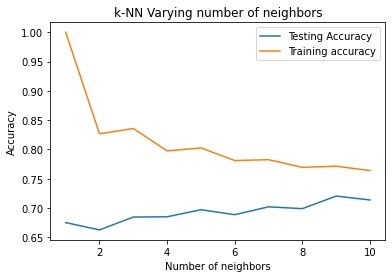

In [33]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=9) 
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))
print('Accuracy class:'  ,metrics.precision_score(y_test,y_pred,average=None))

Accuracy : 0.7205553067622034
Accuracy class: [0.72844828 0.71202237]


In [35]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1154
           1       0.71      0.71      0.71      1079

    accuracy                           0.72      2233
   macro avg       0.72      0.72      0.72      2233
weighted avg       0.72      0.72      0.72      2233



### SVM

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
model_SVM = SVC(kernel = 'linear', random_state = 0)
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_pred = model_SVM.predict(X_test)

In [40]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))
print('Accuracy class:'  ,metrics.precision_score(y_test,y_pred,average=None))

Accuracy : 0.7850425436632333
Accuracy class: [0.77003205 0.80406091]


In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1154
           1       0.80      0.73      0.77      1079

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.79      0.78      2233

